Load libraries

In [1]:
install.packages("fpc")
install.packages("dbscan")
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



In [14]:
library("fpc")
library("dbscan")
library("factoextra")


Attaching package: ‘dbscan’


The following object is masked from ‘package:fpc’:

    dbscan


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [19]:
mall_data = read.csv('./mall_customers.csv', header = TRUE)
mall_data = data.frame(mall_data)
print(sprintf("Dataset of %d row with %d columns each", nrow(mall_data), ncol(mall_data)))

[1] "Dataset of 200 row with 5 columns each"


In [20]:
head(mall_data)
summary(mall_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   CustomerID        Gender               Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [21]:
sum(is.na(mall_data))

[1] 0

In [349]:
pulsar_original <- data.frame(df)
df$target_class <- NULL
df$Standard.deviation.of.the.integrated.profile <- NULL
df$Excess.kurtosis.of.the.integrated.profile <- NULL
df$Skewness.of.the.integrated.profile <- NULL
df$Standard.deviation.of.the.DM.SNR.curve <- NULL

df$Mean.of.the.integrated.profile <- NULL
df$Mean.of.the.DM.SNR.curve <- NULL

df$Excess.kurtosis.of.the.DM.SNR.curve <- 10 * df$Excess.kurtosis.of.the.DM.SNR.curve

df[1:10, ]

,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve
,<dbl>,<dbl>
1,79.75532,74.24222
2,105.76487,127.39358
3,77.35822,63.17191
4,68.96499,53.59366
5,142.69573,252.56731
6,106.21748,131.39400
7,192.06230,479.75657
8,135.39456,198.23646
9,90.01004,107.97251


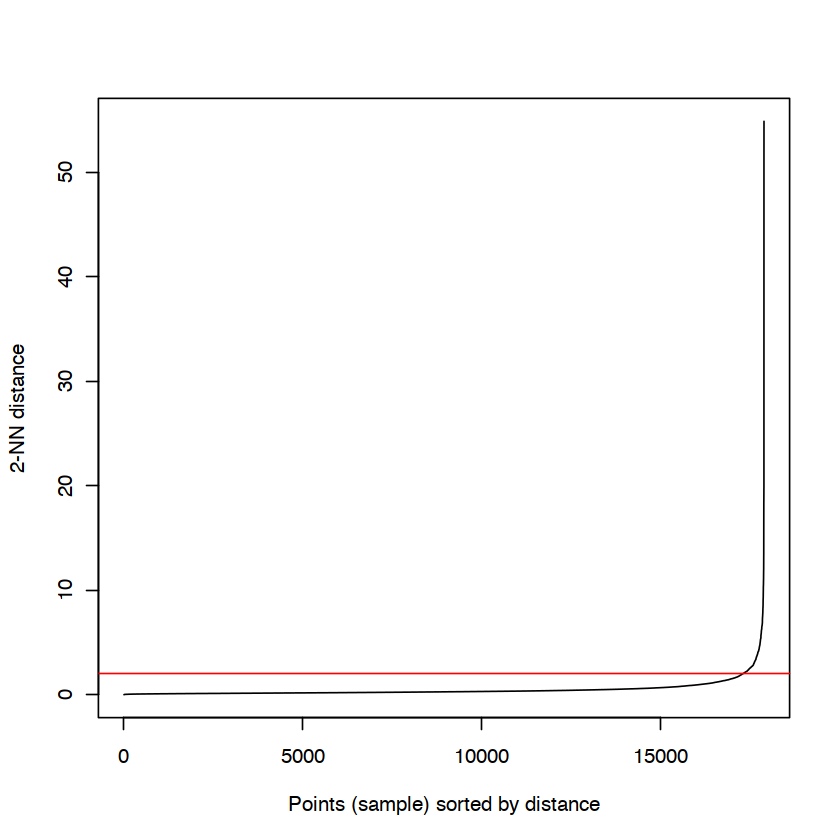

In [350]:
library(dbscan)

pulsar_matrix <- as.matrix(df)
kNNdistplot(pulsar_matrix, k=2)
abline(h=2, col="red")

In [356]:
set.seed(0)
db = kmeans(pulsar_matrix, 6)
db

K-means clustering with 6 clusters of sizes 150, 6131, 4622, 674, 4387, 1934

Cluster means:
  Excess.kurtosis.of.the.DM.SNR.curve Skewness.of.the.DM.SNR.curve
1                           251.63083                    711.99865
2                            76.53195                     67.46977
3                           104.15867                    132.29775
4                           180.68241                    387.10816
5                            25.72616                     10.18097
6                           136.06334                    227.11028

Clustering vector:
    [1] 2 3 2 2 6 3 4 6 3 2 2 6 5 2 5 2 6 2 5 5 2 2 3 5 2 5 3 2 3 3 6 4 3 2 3 3
   [37] 2 2 6 3 2 2 6 2 6 3 3 6 2 3 6 2 2 4 4 2 3 6 2 6 2 5 5 3 6 6 2 2 2 6 3 2
   [73] 2 2 5 3 5 2 3 2 2 6 2 6 2 3 5 3 3 3 2 2 5 5 5 4 2 2 2 3 5 5 3 2 2 6 2 3
  [109] 2 2 5 5 2 2 5 6 3 5 5 2 3 2 3 2 2 3 6 3 2 3 5 3 5 3 5 2 3 2 2 6 2 3 2 3
  [145] 3 5 5 2 2 3 2 2 6 2 3 5 4 3 3 2 6 5 2 2 2 2 3 3 2 2 2 5 2 5 2 6 3 5 5 3
  [181] 3 6 5 2 4 

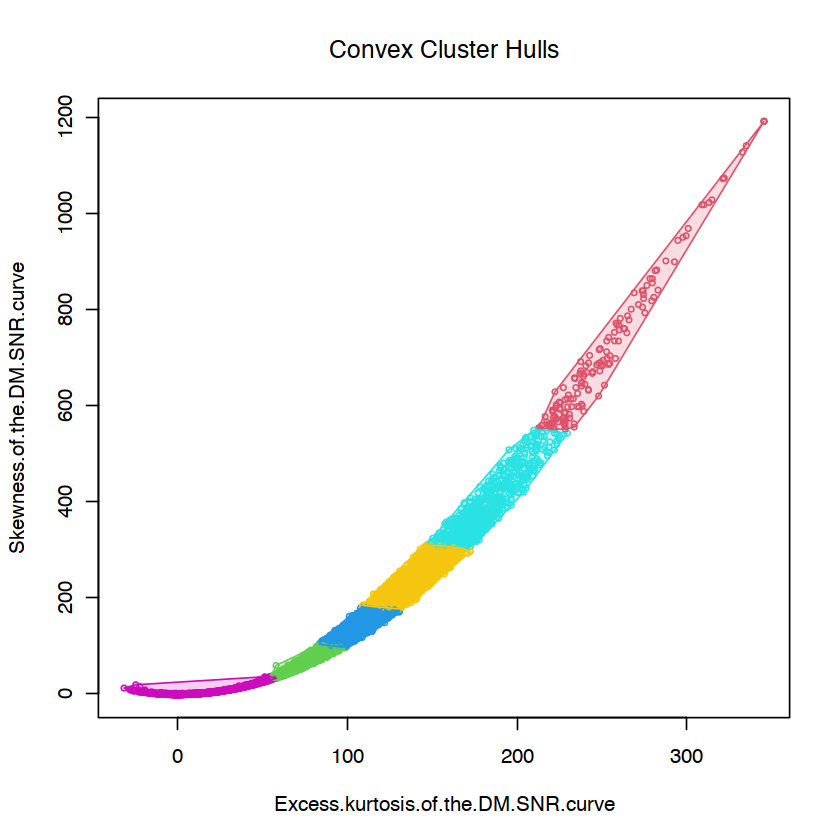

In [364]:
hullplot(pulsar_matrix, db$cluster)

In [358]:
table(pulsar_original$target_class, db$cluster)

   
       1    2    3    4    5    6
  0  149 5986 4586  666 2962 1910
  1    1  145   36    8 1425   24

In [359]:
#cs = cluster.stats(dist(df), db$cluster)

In [360]:
#cs[c("within.cluster.ss","avg.silwidth")]